In [16]:
import pandas as pd
import pandas_ta as ta
import yfinance as yf
#import pdblp
import matplotlib.pyplot as plt
import datetime as dt

def get_bbg_history_df(contract, field, start_date, end_date):
    data = con.bdh(contract, field, start_date, end_date)[contract][field]
    df = pd.DataFrame({'date': list(data.index), field: list(data.values)}).set_index('date')
    return df

def get_yf_history_df(ticker, start_date, end_date, interval):
    ticker = yf.Ticker(ticker)
    df = ticker.history(start = start_date, end = end_date, interval=interval)
    return df

def get_indicator_graph(df, indicator):
    plt.figure(figsize=(24,12))
    
    if indicator == 'bbands':
        plt.plot(df.index, df['close'], color = 'black', label = 'Price')
        plt.plot(df.index, df.ta.bbands()[df.ta.bbands().columns[0]], color='green', linestyle='dashed', label=df.ta.bbands().columns[0])
        plt.plot(df.index, df.ta.bbands()[df.ta.bbands().columns[1]], color='red', linestyle='dashed', label=df.ta.bbands().columns[1])
        plt.plot(df.index, df.ta.bbands()[df.ta.bbands().columns[2]], color='blue', linestyle='dashed', label=df.ta.bbands().columns[2])

    if indicator == 'adx':
        plt.plot(df.index, df.ta.adx()[df.ta.adx().columns[0]], color='black', label=df.ta.adx().columns[0])
        plt.plot(df.index, df.ta.adx()[df.ta.adx().columns[1]], color='green', label=df.ta.adx().columns[1])
        plt.plot(df.index, df.ta.adx()[df.ta.adx().columns[2]], color='red', label=df.ta.adx().columns[2])

    if indicator == 'macd':
        plt.plot(df.index, df.ta.macd()[df.ta.macd().columns[0]], color='green', label=df.ta.macd().columns[0])
        plt.bar(df.index, df.ta.macd()[df.ta.macd().columns[1]], color='blue', label=df.ta.macd().columns[1])
        plt.plot(df.index, df.ta.macd()[df.ta.macd().columns[2]], color='red', linestyle = 'dashed', label=df.ta.macd().columns[2])
        
    if indicator == 'volume':
        plt.bar(df.index, df['volume'])
                 
    plt.grid()
    plt.margins(x=0)
    plt.title(indicator.upper(), loc='left')
    plt.xlabel('Date')
    plt.legend(loc='best') 
    plt.savefig('/Users/lukeharding/Desktop/{}.png'.format(indicator), bbox_inches='tight')
    return plt.show()

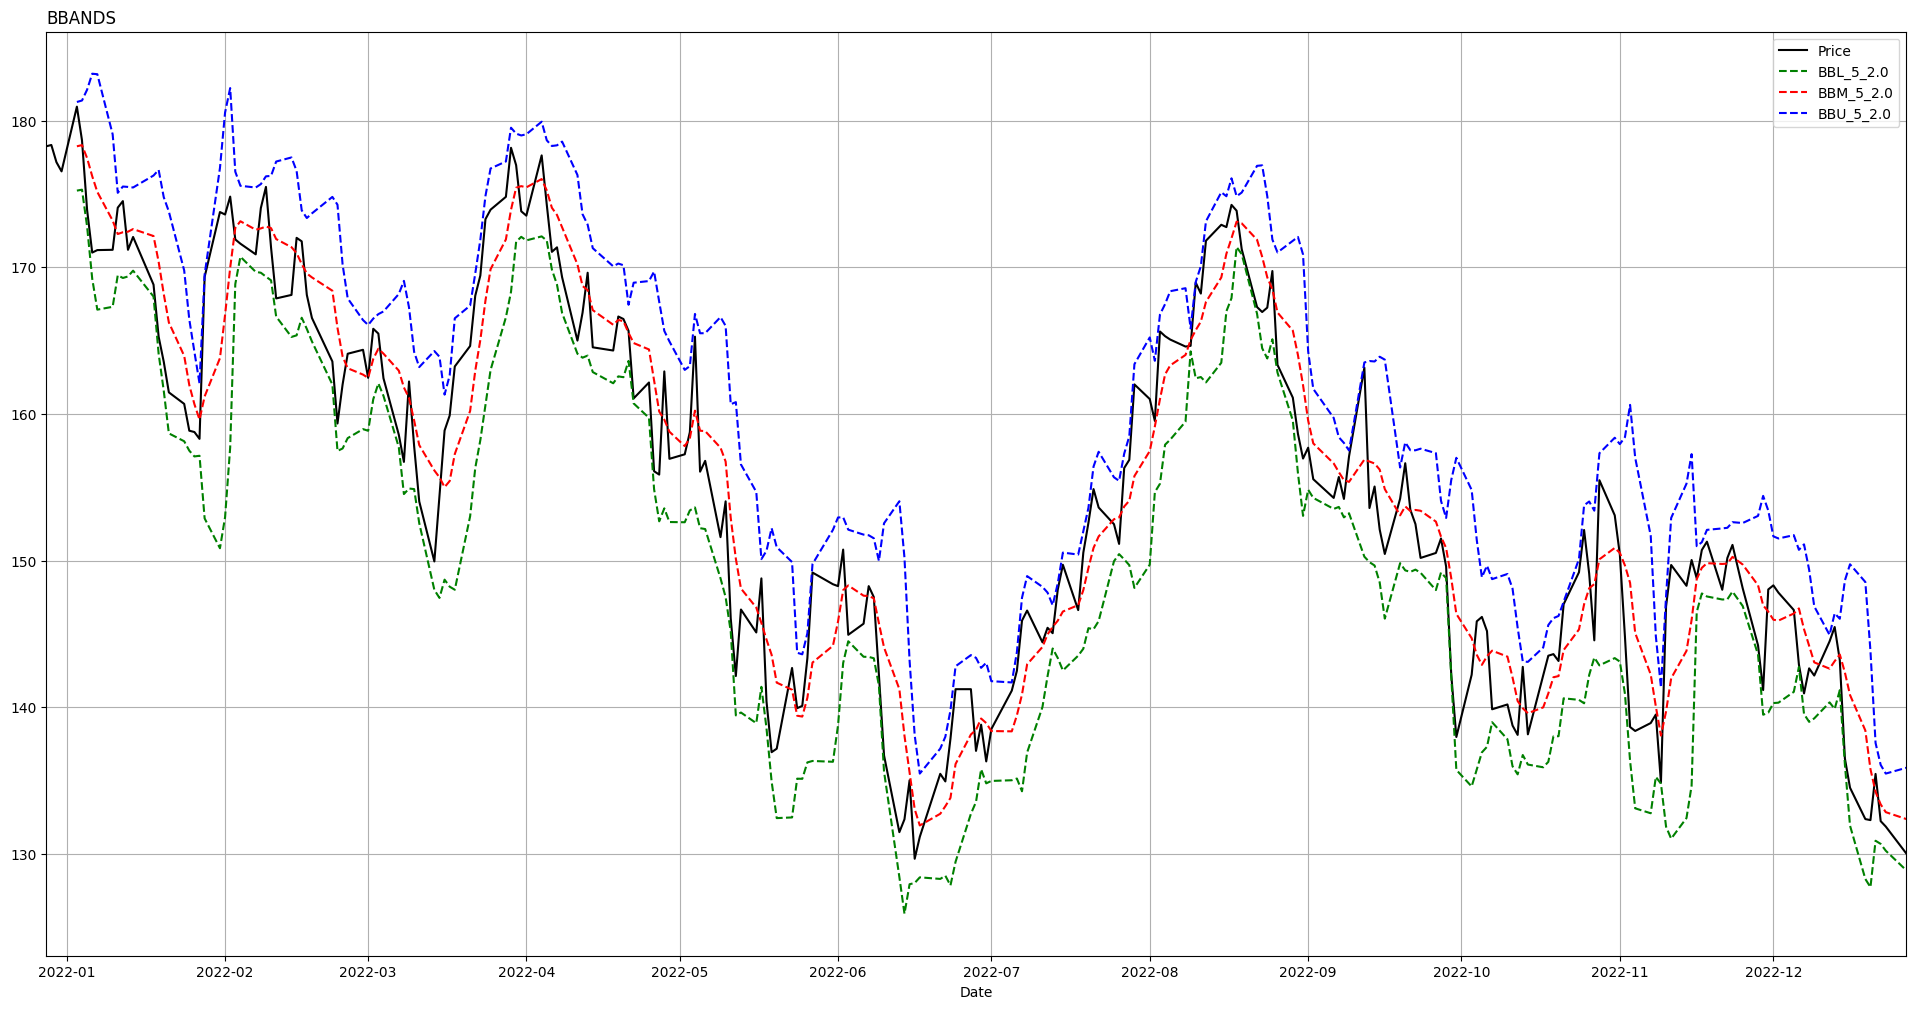

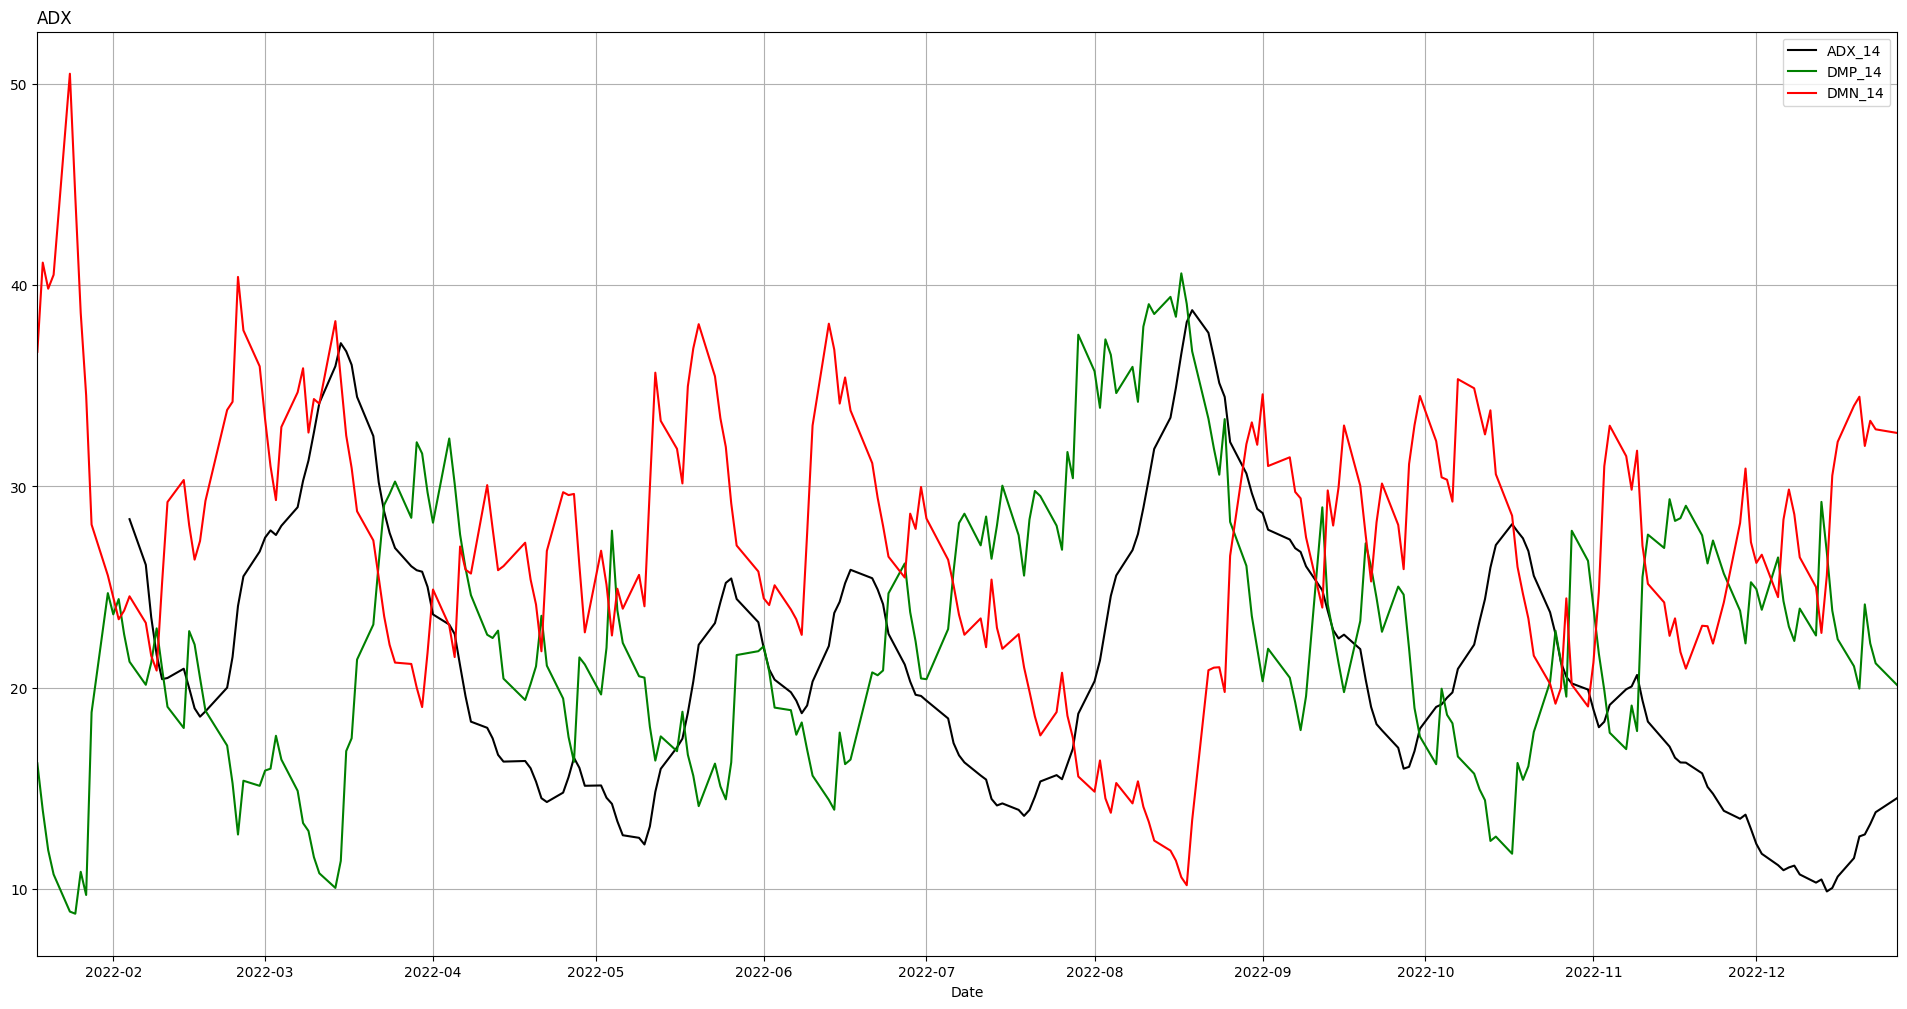

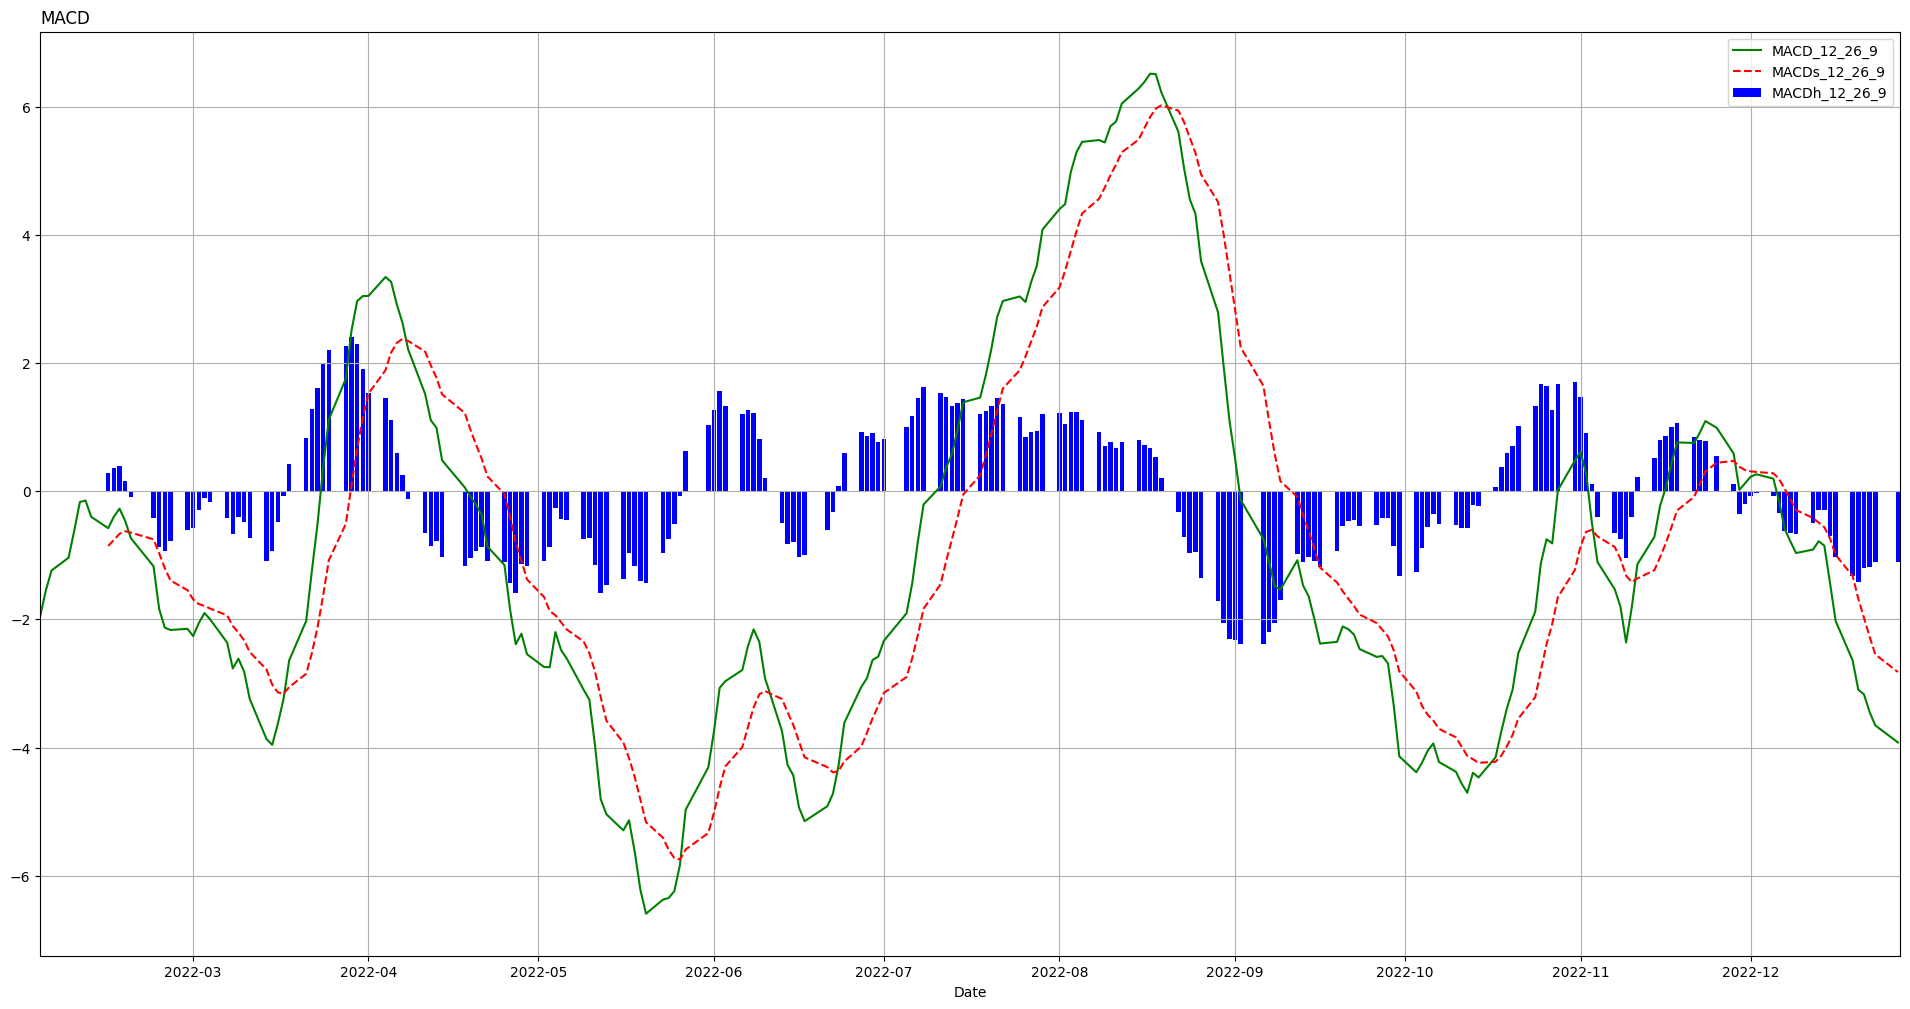

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


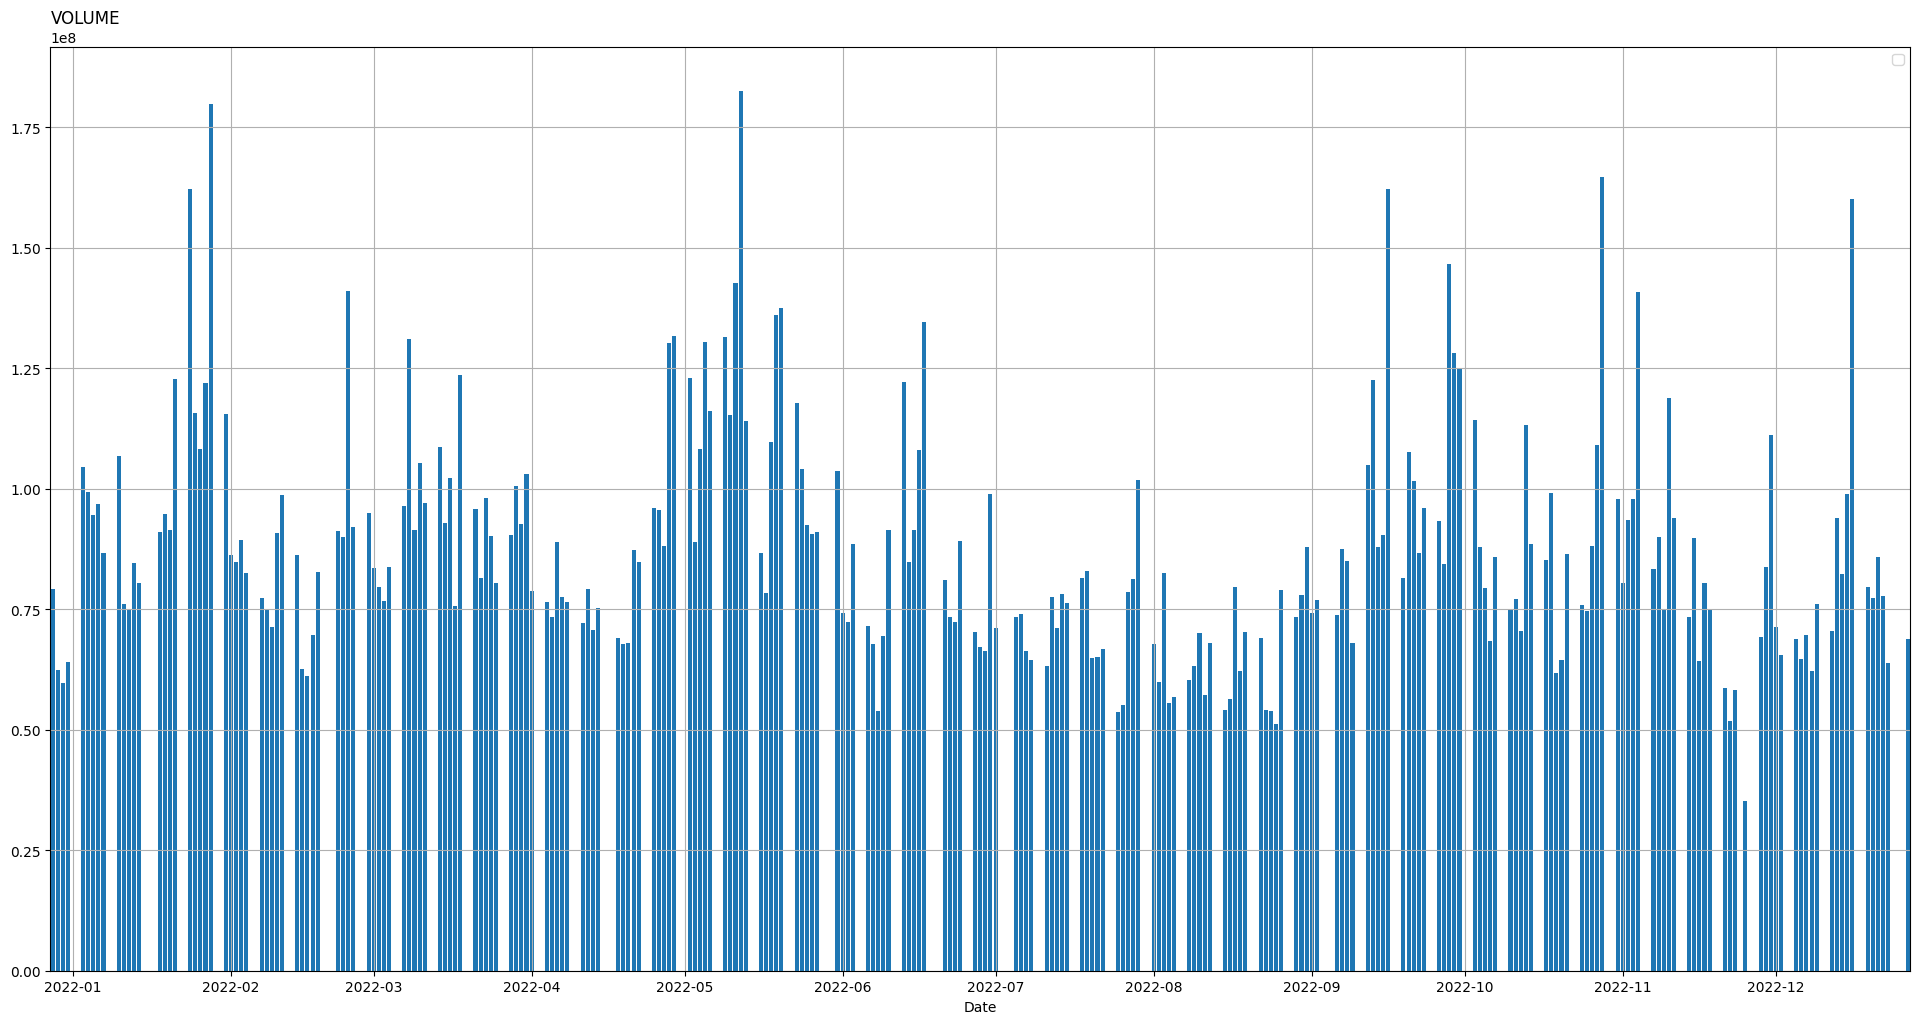

In [17]:
#yfinance

today = dt.datetime.today()
today_minus_year = today.replace(year = today.year - 1)

ticker = 'aapl'
start_date = today_minus_year.strftime('%Y-%m-%d')
end_date = today.strftime('%Y-%m-%d')
interval = '1d'

df = get_yf_history_df(ticker, start_date, end_date, interval)
df.columns = [x.lower() for x in df.columns]

get_indicator_graph(df, 'bbands')
get_indicator_graph(df, 'adx')
get_indicator_graph(df, 'macd')
get_indicator_graph(df, 'volume')


In [ ]:
#bloomberg

contract='SFRH3 Comdty'
df = get_bbg_history_df(contract, 'PX_LAST', '20220101', '20221223')
df1 = get_bbg_history_df(contract, 'PX_LOW', '20220101', '20221223')
df2 = get_bbg_history_df(contract, 'PX_HIGH', '20220101', '20221223')
df3 = get_bbg_history_df(contract, 'VOLUME', '20220101', '20221223')
df = df.join(df1).join(df2).join(df3)
df = df.rename(columns={'PX_LAST':'close', 'PX_LOW':'low', 'PX_HIGH':'high', 'VOLUME':'Volume'})

get_indicator_graph(df, 'bbands') #bbands adx macd volume
get_indicator_graph(df, 'adx') 
get_indicator_graph(df, 'macd') 
get_indicator_graph(df, 'volume') 